loading data
plotting lidar
plottinig random particles
calculating weight for [1.81000712 1.5873495  5.9902572 ]

calculating weight for [8.62585302 5.13098766 5.0463861 ]

calculating weight for [7.50279174 3.05326041 5.29450848]

calculating weight for [ 9.16809739 13.94115433  0.54416996]

calculating weight for [0.50153557 8.04494408 5.29779329]

calculating weight for [10.4550539   8.22252053  3.26173133]

calculating weight for [ 3.69194679 12.29396313  3.72784434]

calculating weight for [7.60554342 4.96928166 0.40708747]

calculating weight for [6.99561603 7.32255795 2.50602057]

calculating weight for [4.87530838 2.34703113 0.21829292]

calculating weight for [2.17068952 9.26314937 5.21853303]

calculating weight for [7.39000575 7.60774691 2.32847249]

calculating weight for [4.33837738 8.7335396  2.68238554]

calculating weight for [7.91472154 2.5638411  0.59169703]

calculating weight for [ 9.16212967 13.60043357  2.77527714]

calculating weight for [2.06189569 0.73114215 5.

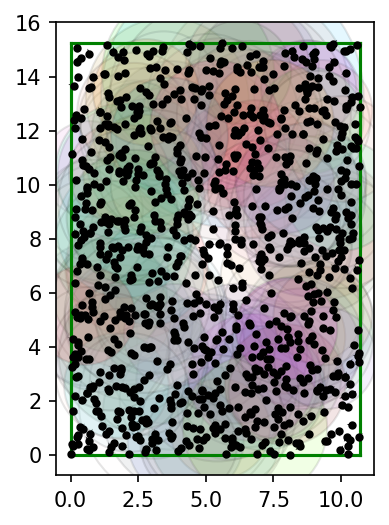

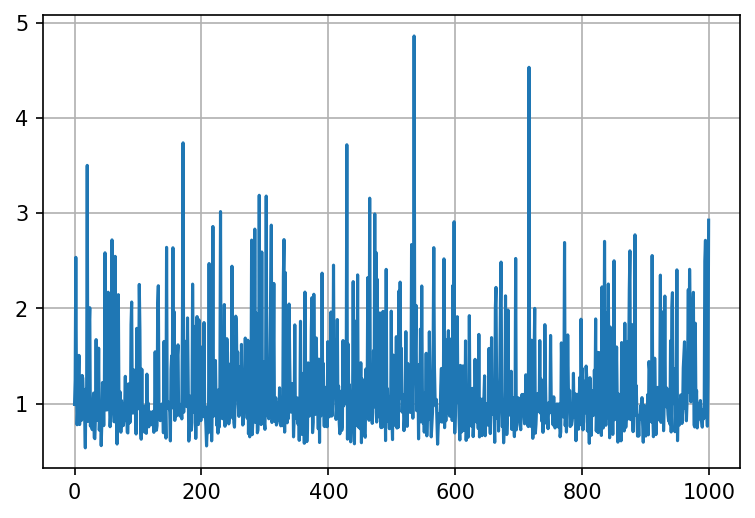

In [19]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import shapely
import random
from matplotlib.colors import CSS4_COLORS


def draw_env(w, h):
    plt.plot((0, w), (0, 0), 'g')
    plt.plot((0, 0), (h, 0), 'g')
    plt.plot((w, w), (h, 0), 'g')
    plt.plot((0, w), (h, h), 'g')
    plt.grid()


def draw_particles_(p, color="k"):
    xs, ys, thetas = p.T
    plt.plot(xs, ys, '.', color=color)
    plt.quiver(xs, ys, np.cos(thetas), np.sin(thetas), color=color)


# Particles
def draw_particles_random(w, h, n, verbose=True):
    xs = np.random.sample(n) * w
    ys = np.random.sample(n) * h
    theta = np.random.sample(n) * 2 * np.pi

    p = np.vstack((xs, ys, theta)).T

    if verbose:
        draw_env(w, h)
        draw_particles_(p)
    return p


def draw_points_one_trial(position_polar, verbose=True):
    position = np.array([[position_polar[i, 1] * np.cos(position_polar[i, 0] * np.pi / 180),
                          position_polar[i, 1] * np.sin(position_polar[i, 0] * np.pi / 180),
                          position_polar[i, 0] * np.pi / 180]
                         for i in range(position_polar.shape[0])])
    if verbose:
        for i in range(position.shape[0]):
            plt.plot(position[:, 0], position[:, 1], 'ro', markersize=1)
    return position


if __name__ == "__main__":
    step_size_mean = 1.2
    d = step_size_mean
    w = 10.7
    h = 15.24

    # creating polygon using Polygon() of the desired map
    poly = Polygon([[0, 0], [w, 0], [w, h], [0, h], [0, 0]])


    def distance_to_map(poly, px, py):
        return poly.boundary.distance(Point((px, py)))


    num_particles = 1000
    sigma_u = [0.1, 0.1, 0.01]
    print("loading data")
    with open("samples.dat", "rb") as f:
        positions = pickle.load(f)

    # fig = plt.figure(figsize=(10, 8), frameon=True, dpi=300)
    # ax = fig.add_subplot(111)
    # ax.set_aspect("equal")
    # ax.grid()
    position_polar = np.array(positions[9])
    print("plotting lidar")
    position_cart = draw_points_one_trial(position_polar, False)

    fig = plt.figure(frameon=True, dpi=150)
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    ax.grid()
    print("plottinig random particles")
    particles = draw_particles_random(w, h, num_particles)

    new_particles = []
    errors = [0] * num_particles

    for i in range(num_particles):
        print("calculating weight for {}".format(particles[i, :]))
        # move particles based on the distribution
        # 1. motion model
        x, y, theta = particles[i, :]

        # samples for particle
        spx = x + np.cos(theta) * position_cart[:, 0] - np.sin(theta) * position_cart[:, 1]
        spy = y + np.sin(theta) * position_cart[:, 0] + np.cos(theta) * position_cart[:, 1]

        # plt.figure()
        # plt.plot(spx, spy, '.')
        # plt.title("{}".format(particle))
        errors[i] = np.sum([distance_to_map(poly, spx[j], spy[j]) ** 2 for j in range(spx.shape[0])])
        print()

    errors_normalized = errors / np.sum(errors)
    weights = 0.001 / errors_normalized
    weights_avg = np.average(weights)
    colors = [name for name, _ in CSS4_COLORS.items()]

    for i in range(num_particles):
        print("plotting weight for {}".format(particles[i, :]))
        # move particles based on the distribution
        # 1. motion model
        x, y, theta = particles[i, :]

        fill = random.choice(colors)
        if weights[i] > 1.5*weights_avg:
            draw_circle = plt.Circle((x, y), weights[i], alpha=0.1, ec=[0, 0, 0], fc=fill)
            ax.add_artist(draw_circle)
        print()

    #
    #     delta_mu_x = d * np.cos(theta)
    #     delta_mu_y = d * np.sin(theta)
    #     delta_mu_theta = 0
    #     # 2. Estimation
    #     mu_x = x + delta_mu_x
    #     mu_y = y + delta_mu_y
    #     mu_theta = theta + delta_mu_theta
    #     # 3. Sampling
    #     xt = np.random.normal(mu_x, sigma_u[0])
    #     yt = np.random.normal(mu_y, sigma_u[1])
    #     thetat = np.random.normal(mu_theta, sigma_u[2])
    #     new_particles.append([xt, yt, thetat])
    #
    # new_particles = np.array(new_particles)
    # draw_particles_(new_particles, 'r')
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(111)
    ax.grid()
    plt.plot(weights)


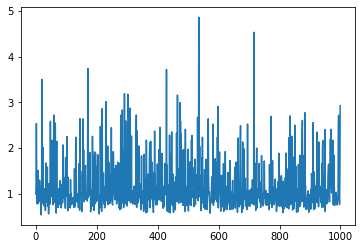

In [20]:
plt.plot(weights)